# Programming tasks: part 12

Required datasets: `prostate.csv`, `titanic.csv`

In [ ]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

## Task 1

Load `prostate.csv`.

### a. Split the dataset into test and training (70%) sets.

In [ ]:
url = 'prostate.csv'
dataframe = pandas.read_csv(url,header=0)
data = dataframe.values
X, y = data[:,:-1], data[:, -1]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3)

### b. Train a logistic model on the data.

In [ ]:
clf = LogisticRegression(penalty = 'none',max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

### c. Fit a bagging method using 100 logistic models. Bootrstrap samples are the same size as the training set.

In [ ]:
clf2 = BaggingClassifier(base_estimator=LogisticRegression(penalty = 'none',max_iter=1000),n_estimators=100)
clf2.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    penalty='none'),
                  n_estimators=100)

### d. Calculate AUC.

In [ ]:
clf_probs = clf.predict_proba(X_test)
clf_probs = clf_probs[:, 1]
print(roc_auc_score(y_test, clf_probs))
clf2_probs = clf2.predict_proba(X_test)
clf2_probs = clf2_probs[:, 1]
print(roc_auc_score(y_test, clf2_probs))

0.8464912280701754
0.8903508771929824


Using a bagging method we get a better model.

## Task 2
 Load `titanic.csv`.

### a. Split the dataset into test and training (70%) sets.

In [ ]:
url = 'titanic.csv'
dataframe = pandas.read_csv(url,header=0)
print(dataframe)
data = dataframe.values
data = data[::-1,:]
X, y = data[:,1:], data[:, 0]
y = y.astype(int)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3)
print(X_train.shape)

     Survived  Pclass  Sex   Age  Siblings.Spouses.Aboard  \
0           0       3    0  22.0                        1   
1           1       1    1  38.0                        1   
2           1       3    1  26.0                        0   
3           1       1    1  35.0                        1   
4           0       3    0  35.0                        0   
..        ...     ...  ...   ...                      ...   
882         0       2    0  27.0                        0   
883         1       1    1  19.0                        0   
884         0       3    1   7.0                        1   
885         1       1    0  26.0                        0   
886         0       3    0  32.0                        0   

     Parents.Children.Aboard     Fare  
0                          0   7.2500  
1                          0  71.2833  
2                          0   7.9250  
3                          0  53.1000  
4                          0   8.0500  
..                       ..

### a. Fit a decision tree explaining the `Survived` variable using the other variables.

In [ ]:
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

### c. Fit a bagging method using trees. Consider 50, 100, 1000 decision trees. Using `GridSearchCV` find the optimal number of trees.

In [ ]:
clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=123))
param_grid= {"n_estimators":[50,100,1000]}
clf_bag = GridSearchCV(clf2,param_grid,n_jobs=-1)
clf_bag.fit(X_train,y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=123)),
             n_jobs=-1, param_grid={'n_estimators': [50, 100, 1000]})

### d. Fit an AdaBoost method using trees. Consider 50, 100, 1000 decision trees. Using `GridSearchCV` find the optimal number of trees.

In [ ]:
clf3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=123))
param_grid= {"n_estimators":[50,100,1000]}
clf_boo = GridSearchCV(clf3,param_grid,n_jobs=-1)
clf_boo.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=123)),
             n_jobs=-1, param_grid={'n_estimators': [50, 100, 1000]})

### e. Fit a random forest. Consider 50, 100, 1000 decision trees. Using `GridSearchCV` find the optimal number of trees.

In [ ]:
clf4 = RandomForestClassifier(random_state=123)
param_grid= {"n_estimators":[50,100,1000]}
clf_rf = GridSearchCV(clf4,param_grid,n_jobs=-1)
clf_rf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 1000]})

### f. Calculate the AUC score for each model on the test set. Which of the models performs best

In [ ]:
clf_probs = clf.predict_proba(X_test)
clf_probs = clf_probs[:, 1]
print(roc_auc_score(y_test, clf_probs))
clf_bag_probs = clf_bag.predict_proba(X_test)
clf_bag_probs = clf_bag_probs[:, 1]
print(roc_auc_score(y_test, clf_bag_probs))
clf_boo_probs = clf_boo.predict_proba(X_test)
clf_boo_probs = clf_boo_probs[:, 1]
print(roc_auc_score(y_test, clf_boo_probs))
clf_rf_probs = clf_rf.predict_proba(X_test)
clf_rf_probs = clf_rf_probs[:, 1]
print(roc_auc_score(y_test, clf_rf_probs))

0.7613517593775404
0.8551852281964929
0.8342236674021601
0.8619207989780513


We can see that random forest gives us best results. The bagging method performs slightly worse. A regular decision tree gives the wrost result.

## Task 3

Generate $n=100$ observations from $N_p(0,I)$, for $p=10$. Let $\beta_0=1$ and $\beta_1=[2,1,0.5,0.01,0,2,1,0.5,0.01,0]$ and let $y_i$ be an observation from $Bern(p_i)$, where $p_i=𝛟(\beta_0+\beta_1 x_i)$, $𝛟$ is the CDF of $N_p(0,I)$, $i=1,2,...,n$.

### a. Split the data into training (70%) and test sets. 

In [ ]:
n = 100
p = 10
beta0 = 1
beta1 = np.array([2, 1, 0.5, 0.01, 0, 2, 1, 0.5, 0.01, 0])
X = np.random.normal(0, 1, size=(n, p))
probs = norm.cdf(X@beta1+beta0)
y = np.random.binomial(1, probs)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3,shuffle = False)

### b. Fit a decision tree explaining the $y$ variable using the $x$ variable. Fit a bagging, Adaboost and random forest model using 100 trees.

In [ ]:
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train,y_train)
clf_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=123),n_estimators = 100)
clf_bag.fit(X_train,y_train)
clf_boo = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=123),n_estimators = 100)
clf_boo.fit(X_train,y_train)
clf_rf = RandomForestClassifier(n_estimators = 100)
clf_rf.fit(X_train,y_train)

RandomForestClassifier()

### c. Calculate the AUC score for each model.

In [ ]:
clf_probs = clf.predict_proba(X_test)
clf_probs = clf_probs[:, 1]
print(roc_auc_score(y_test, clf_probs))
clf_bag_probs = clf_bag.predict_proba(X_test)
clf_bag_probs = clf_bag_probs[:, 1]
print(roc_auc_score(y_test, clf_bag_probs))
clf_boo_probs = clf_boo.predict_proba(X_test)
clf_boo_probs = clf_boo_probs[:, 1]
print(roc_auc_score(y_test, clf_boo_probs))
clf_rf_probs = clf_rf.predict_proba(X_test)
clf_rf_probs = clf_rf_probs[:, 1]
print(roc_auc_score(y_test, clf_rf_probs))

0.7375565610859729
0.8506787330316742
0.7375565610859729
0.8733031674208145


### d. Repeat the previous steps $L=100$ times. Create a boxplot showing the AUC changes.

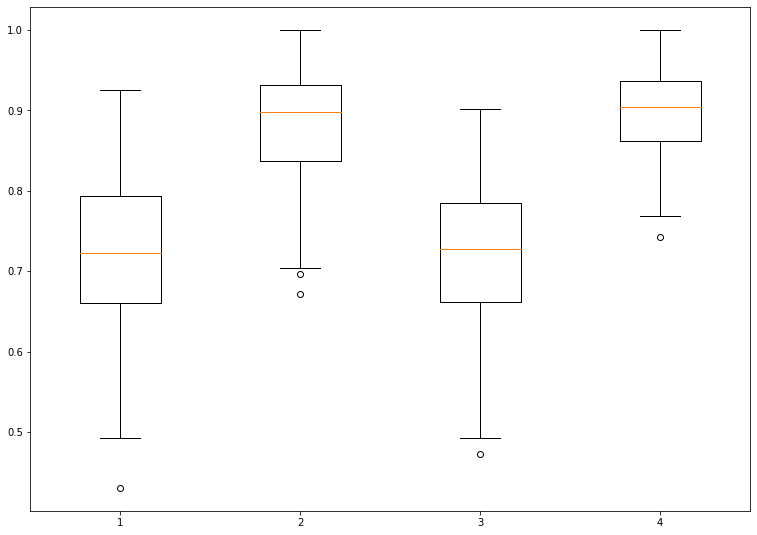

In [ ]:
L = 100
AUC_clf = np.zeros(L)
AUC_clf_bag = np.zeros(L)
AUC_clf_boo = np.zeros(L)
AUC_clf_rf = np.zeros(L)
for i in range(L):
  X = np.random.normal(0, 1, size=(n, p))
  probs = norm.cdf(X@beta1+beta0)
  y = np.random.binomial(1, probs)
  X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3,shuffle = False)
  clf.fit(X_train,y_train)
  clf_bag.fit(X_train,y_train)
  clf_boo.fit(X_train,y_train)
  clf_rf.fit(X_train,y_train)
  clf_probs = clf.predict_proba(X_test)
  clf_probs = clf_probs[:, 1]
  AUC_clf[i] = roc_auc_score(y_test, clf_probs)
  clf_bag_probs = clf_bag.predict_proba(X_test)
  clf_bag_probs = clf_bag_probs[:, 1]
  AUC_clf_bag[i] = roc_auc_score(y_test, clf_bag_probs)
  clf_boo_probs = clf_boo.predict_proba(X_test)
  clf_boo_probs = clf_boo_probs[:, 1]
  AUC_clf_boo[i] = roc_auc_score(y_test, clf_boo_probs)
  clf_rf_probs = clf_rf.predict_proba(X_test)
  clf_rf_probs = clf_rf_probs[:, 1]
  AUC_clf_rf[i] = roc_auc_score(y_test, clf_rf_probs)

AUCs = [AUC_clf, AUC_clf_bag, AUC_clf_boo, AUC_clf_rf]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(AUCs)
plt.show()